In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/My Drive/CSE544_final_project'

/content/gdrive/My Drive/CSE544_final_project


In [ ]:
data = pd.read_csv("9.csv")
data.describe()  

,KS confirmed,KY confirmed,KS deaths,KY deaths
count,438.000000,438.000000,438.000000,438.000000
mean,96121.751142,121762.171233,1322.926941,1529.216895
std,110627.761059,147629.269166,1643.278324,1641.846229
min,0.000000,0.000000,0.000000,0.000000
25%,7012.500000,6495.000000,174.500000,305.750000
50%,41061.000000,46367.500000,445.500000,914.000000
75%,193281.750000,227030.000000,2109.000000,2233.500000
max,302899.000000,429238.000000,4933.000000,6150.000000


Above table shows the stats for cumulative dataset.



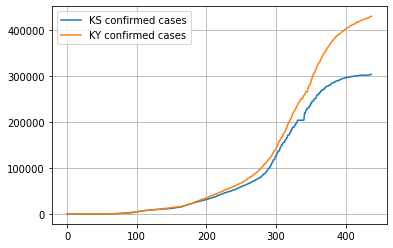

In [ ]:
plt.plot(data['KS confirmed'], label='KS confirmed cases')
plt.plot(data['KY confirmed'], label='KY confirmed cases')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

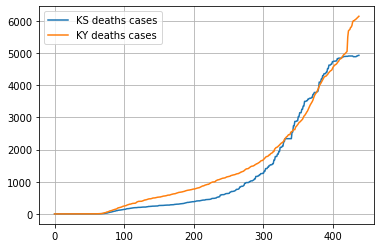

In [ ]:
plt.plot(data['KS deaths'], label='KS deaths cases')
plt.plot(data['KY deaths'], label='KY deaths cases')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

**Mandatory task 1: Data cleaning and outlier Removal.**

In [ ]:
#to check if the missing values is present or not.
def check_null_values(input):
    ans = input.isnull().values.any()
    return ans

In [ ]:
if not check_null_values(data):
        print("No missing values are present in the data.\n")
else:
        print("some missing values are present in the data.\n")

No missing values are present in the data.



From above output, we found out that in our cumulative data, there were **no missing values**.

In [ ]:
#To covert cumulative data into daily data.
def converting_cumulative_to_daily(cumulative_data):
    df = pd.DataFrame()
    df['Date'], df['KS confirmed'], df['KY confirmed'], \
    df['KS deaths'], df['KY deaths'] = [], [], [], [], []
    df.at[0] = cumulative_data.iloc[0]
    for i in range(1, cumulative_data.shape[0]):
        df.at[i, 'Date'] = cumulative_data.iloc[i]['Date']
        df.at[i, "KS confirmed"] \
            = cumulative_data.iloc[i]['KS confirmed'] - cumulative_data.iloc[i-1]['KS confirmed']
        df.at[i, 'KY confirmed'] = cumulative_data.iloc[i]['KY confirmed'] - cumulative_data.iloc[i-1]['KY confirmed']
        df.at[i, 'KS deaths'] = cumulative_data.iloc[i]['KS deaths'] - cumulative_data.iloc[i-1]['KS deaths']
        df.at[i, 'KY deaths'] = cumulative_data.iloc[i]['KY deaths'] - cumulative_data.iloc[i-1]['KY deaths']
    if((df.iloc[:,1:] < 0).values.any()):
      df['KS confirmed'].mask(df['KS confirmed'] < 0, 0, inplace=True)
      df['KS deaths'].mask(df['KS deaths'] < 0, 0, inplace=True)
      df['KY confirmed'].mask(df['KY confirmed'] < 0, 0, inplace=True)
      df['KY deaths'].mask(df['KY deaths'] < 0, 0, inplace=True)
      print((df.iloc[:,1:] < 0).values.any())

    return df

daily_data = converting_cumulative_to_daily(data)
daily_data 

False


,Date,KS confirmed,KY confirmed,KS deaths,KY deaths
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
433,2021-03-30,0.0,699.0,0.0,22.0
434,2021-03-31,950.0,772.0,22.0,25.0
435,2021-04-01,0.0,969.0,0.0,18.0
436,2021-04-02,515.0,671.0,19.0,21.0


In [ ]:
def outlier_detection(data1):
    df = data1.iloc[:, 1]
    n = df.size
    df = df.sort_values(ascending=True)
    q1 = df[int(np.ceil(0.25 * n))]
    q3 = df[int(np.ceil(0.75 * n))]
    iqr = q3 - q1
    alpha = 1.5
    upper_limit = q3 + alpha * iqr
    lower_limit = q1 - alpha * iqr
    # print('lower', lower_limit)
    data1 = data1.loc[((df < lower_limit) | (df > upper_limit))]
    if len(data1):
        print("\nOutliers present in the dataset are :\n", data1)
    return data1.iloc[:, 0]


def remove_outliers(ks_confirmed, ks_deaths, ky_confirmed, ky_deaths):
    outliers = []
    l1 = outlier_detection(ky_deaths)
    l2 = outlier_detection(ks_confirmed)
    l3 = outlier_detection(ky_confirmed)
    l4 = outlier_detection(ks_deaths)
    if len(l1):
        outliers.append(l1)
    if len(l2):
        outliers.append(l2)
    if len(l3):
        outliers.append(l3)
    if len(l4):
        outliers.append(l4)

    outliers = np.array(outliers)
    print('\nNumber of outliers present in the dataset :', len(outliers[0]))

    indexes = daily_data[daily_data['Date'].isin(outliers[0])].index
    daily_data.drop(indexes, inplace=True)


In [ ]:
def mand_task_1(input):
    ks_confirmed = input.drop(['KY confirmed', 'KY deaths', 'KS deaths'], axis=1)
    ks_deaths = input.drop(['KS confirmed', 'KY confirmed', 'KY deaths'], axis=1)

    ky_confirmed = input.drop(['KS confirmed', 'KY deaths', 'KS deaths'], axis=1)
    ky_deaths = input.drop(['KS confirmed', 'KY confirmed', 'KS deaths'], axis=1)

    print('Before removing outliers, shape of dataset : ', daily_data.shape)
    remove_outliers(ks_confirmed, ks_deaths, ky_confirmed, ky_deaths)
    print('\nAfter removing outliers, shape of dataset : ', daily_data.shape)
    print("--------------------------------------------------------------------------------")
    daily_data.to_csv('updated_9.csv')
    print("Data saved to new csv file named 'updated_9.csv' after deleting outliers.")


mand_task_1(daily_data)


Before removing outliers, shape of dataset :  (438, 5)

Outliers present in the dataset are :
            Date  KY deaths
316  2020-12-03       71.0
330  2020-12-17       55.0
339  2020-12-26       68.0
346  2021-01-02       76.0
358  2021-01-14       53.0
365  2021-01-21       57.0
367  2021-01-23       52.0
372  2021-01-28       69.0
373  2021-01-29       57.0
378  2021-02-03       51.0
379  2021-02-04       58.0
380  2021-02-05       50.0
399  2021-02-24       51.0
409  2021-03-06       52.0
421  2021-03-18      448.0
422  2021-03-19      191.0
425  2021-03-22       61.0
428  2021-03-25      107.0

Outliers present in the dataset are :
            Date  KS confirmed
341  2020-12-28       15432.0

Outliers present in the dataset are :
            Date  KY confirmed
346  2021-01-02        8709.0

Number of outliers present in the dataset : 18

After removing outliers, shape of dataset :  (420, 5)
--------------------------------------------------------------------------------
Data sav

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


For data cleaning, we have carried out the following steps after converting our cumulative dataset into daily dataset:

After converting into daily data, 6 negative values were found. We replaced all the negative values to 0. 

Before removing outliers, number of datapoints in our dataset was 438.


*   **Checking for missing values:** In our data, no missing values were present.

*   **Checking for outliers using Tukey's rule:** In our dataset, after performing Tukey's rule, 18 outliers were found. After removing the outliers, 420 datapoints is present.



**Mandatory Task 2:**

In [ ]:
data = pd.read_csv("updated_9.csv")
data.describe()

,Unnamed: 0,KS confirmed,KY confirmed,KS deaths,KY deaths
count,420.000000,420.000000,420.000000,420.000000,420.000000
mean,211.657143,688.447619,903.342857,10.757143,10.769048
std,124.593627,1532.238889,1098.687184,28.077426,11.270867
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.750000,0.000000,113.250000,0.000000,2.000000
50%,209.500000,88.500000,527.500000,1.000000,7.500000
75%,314.250000,530.750000,1261.250000,6.000000,16.000000
max,437.000000,15432.000000,5705.000000,207.000000,49.000000


Above table shows the stats for the daily data after removing outlier.

In [ ]:
data = data.iloc[:, 1:]

In [ ]:
# TO read the august data.

def get_august_data(input_data):
    ks_confirmed1 = input_data.drop(['KY confirmed', 'KY deaths', 'KS deaths'], axis=1)
    ks_confirmed = ks_confirmed1.loc[
                       (ks_confirmed1['Date'] >= '2020-08-01') & (ks_confirmed1['Date'] <= '2020-08-28')].iloc[:, 1]

    ks_deaths1 = input_data.drop(['KS confirmed', 'KY confirmed', 'KY deaths'], axis=1)
    ks_deaths = ks_deaths1.loc[(ks_deaths1['Date'] >= '2020-08-01') & (ks_deaths1['Date'] <= '2020-08-28')].iloc[:, 1]

    ky_confirmed1 = input_data.drop(['KS confirmed', 'KY deaths', 'KS deaths'], axis=1)
    ky_confirmed = ky_confirmed1.loc[
                       (ky_confirmed1['Date'] >= '2020-08-01') & (ky_confirmed1['Date'] <= '2020-08-28')].iloc[:, 1]

    ky_deaths1 = input_data.drop(['KS confirmed', 'KY confirmed', 'KS deaths'], axis=1)
    ky_deaths = ky_deaths1.loc[(ky_deaths1['Date'] >= '2020-08-01') & (ky_deaths1['Date'] <= '2020-08-28')].iloc[:, 1]

    return ks_confirmed, ks_deaths, ky_confirmed, ky_deaths


In [ ]:
# Auto-regression function:
def auto_regression(x_train, y_train, x_test, y_test, sse, mape):
    m = np.ones((len(x_train), 1))
    X = np.matrix(x_train)
    X = np.concatenate((m, X), axis=1)
    X_transpose = X.T
    mul_inverse = np.linalg.inv(np.matmul(X_transpose, X))
    Y = np.matrix(y_train)
    Y = Y.T
    temp = np.matmul(mul_inverse, X_transpose)
    beta_val = np.matmul(temp, Y)
    mm = np.ones((1, 1))
    x_test = np.matrix(x_test)
    x_test = np.concatenate((mm, x_test), axis=1)
    predicted_y = np.matmul(x_test, beta_val)
    y_test = np.matrix(y_test).T
    print('predicted y : ' + str(predicted_y) + ", Actual y : " + str(y_test))

    error = y_test - predicted_y
    sse.append(error**2)
    if y_test != 0:
      mape.append((abs(error) / y_test) * 100)


def calc_ar(input_data, p):
    arr = input_data.values
    training_xdata = []
    training_ydata = []
    sse = []
    mape = []

    for i in range(0, len(arr) - p, 1):
        training_xdata.append(list(arr[i:i + p]))
        training_ydata.append(arr[i + p])

    for i in range(7):
        train_x = training_xdata[0: 21 - p + i + 1]
        train_y = training_ydata[0: 21 - p + i + 1]

        test_x = training_xdata[21 - p + i: 21 - p + i + 1]
        test_y = training_ydata[21 - p + i: 21 - p + i + 1]

        auto_regression(train_x, train_y, test_x, test_y, sse, mape)

    print("\nMSE : "+"{:5.2f}".format(np.mean(sse)))
    print("MAPE : "+"{:5.2f}".format(np.mean(mape))+"%")



In [ ]:
p = 3
print('--------------with p=3 ----------------')
cases_ks, deaths_ks, cases_ky, deaths_ky = get_august_data(data)
print('For KS confirmed cases : \n')
calc_ar(cases_ks, p)
print('--------------------------------------------')

print('For KS death cases : \n')
calc_ar(deaths_ks, p)
print('--------------------------------------------')

print('For KY confirmed cases : \n')
calc_ar(cases_ky, p)
print('--------------------------------------------')

print('For KY death cases : \n')
calc_ar(deaths_ky, p)
print('--------------------------------------------')


p = 5
print('--------------with p=5 ----------------')
print('For KS confirmed cases : \n')
calc_ar(cases_ks, p)
print('--------------------------------------------')

print('For KS death cases : \n')
calc_ar(deaths_ks, p)
print('--------------------------------------------')

print('For KY confirmed cases : \n')
calc_ar(cases_ky, p)
print('--------------------------------------------')

print('For KY death cases : \n')
calc_ar(deaths_ky, p)
print('--------------------------------------------')

--------------with p=3 ----------------
For KS confirmed cases : 

predicted y : [[101.31046203]], Actual y : [[169.]]
predicted y : [[504.30115833]], Actual y : [[125.]]
predicted y : [[986.84424607]], Actual y : [[1284.]]
predicted y : [[-197.18432519]], Actual y : [[118.]]
predicted y : [[566.49490368]], Actual y : [[1409.]]
predicted y : [[-61.11374079]], Actual y : [[270.]]
predicted y : [[673.60668817]], Actual y : [[1064.]]

MSE : 186850.29
MAPE : 121.84%
--------------------------------------------
For KS death cases : 

predicted y : [[2.72392305]], Actual y : [[5.]]
predicted y : [[2.87994017]], Actual y : [[1.]]
predicted y : [[3.31384768]], Actual y : [[1.]]
predicted y : [[3.66620165]], Actual y : [[1.]]
predicted y : [[4.92896882]], Actual y : [[11.]]
predicted y : [[2.06278674]], Actual y : [[1.]]
predicted y : [[1.98665431]], Actual y : [[1.]]

MSE :  8.59
MAPE : 141.67%
--------------------------------------------
For KY confirmed cases : 

predicted y : [[573.20522192

In [ ]:
def EWMA(input_data, test_y, alpha, sse, mape):
    ans = 0
    for i in range(1, len(input_data)+1, 1):
        ans += ((1-alpha)**(i-1)) * (input_data[-i])
    predicted_y = alpha * ans
    print("Predicted Value : "+ str(predicted_y)+" ,Actual y : "+ str(test_y))
    error = test_y - predicted_y
    sse.append(error ** 2)
    if test_y != 0:
      mape.append((abs(error) / test_y) * 100)


def calc_ewma(input_data, alpha):
    arr = input_data.values
    sse = []
    mape = []
    for i in range(7):
        train_y = arr[:21 + i]
        test_y = arr[21 + i]
        EWMA(train_y, test_y, alpha, sse, mape)
    print("\nMSE : " + "{:5.2f}".format(np.mean(sse)))
    print("MAPE : " + "{:5.2f}".format(np.mean(mape)) + "%")

print('-----------------------EWMA(0.5)---------------------------')
alpha = 0.5
print('\nFor KS confirmed cases : \n')
calc_ewma(cases_ks, alpha)
print('\nFor KS confirmed cases : \n')
calc_ewma(deaths_ks, alpha)
print('\nFor KS confirmed cases : \n')
calc_ewma(cases_ky, alpha)
print('\nFor KS confirmed cases : \n')
calc_ewma(deaths_ky, alpha)

print('-----------------------EWMA(0.8)---------------------------')
alpha = 0.8
print('\nFor KS confirmed cases : \n')
calc_ewma(cases_ks, alpha)
print('\nFor KS confirmed cases : \n')
calc_ewma(deaths_ks, alpha)
print('\nFor KS confirmed cases : \n')
calc_ewma(cases_ky, alpha)
print('\nFor KS confirmed cases : \n')
calc_ewma(deaths_ky, alpha)


-----------------------EWMA(0.5)---------------------------

For KS confirmed cases : 

Predicted Value : 611.9450426101685 ,Actual y : 169.0
Predicted Value : 390.47252130508423 ,Actual y : 125.0
Predicted Value : 257.7362606525421 ,Actual y : 1284.0
Predicted Value : 770.8681303262711 ,Actual y : 118.0
Predicted Value : 444.43406516313553 ,Actual y : 1409.0
Predicted Value : 926.7170325815678 ,Actual y : 270.0
Predicted Value : 598.3585162907839 ,Actual y : 1064.0

MSE : 474945.25
MAPE : 209.02%

For KS confirmed cases : 

Predicted Value : 4.243695259094238 ,Actual y : 5.0
Predicted Value : 4.621847629547119 ,Actual y : 1.0
Predicted Value : 2.8109238147735596 ,Actual y : 1.0
Predicted Value : 1.9054619073867798 ,Actual y : 1.0
Predicted Value : 1.45273095369339 ,Actual y : 11.0
Predicted Value : 6.226365476846695 ,Actual y : 1.0
Predicted Value : 3.6131827384233475 ,Actual y : 1.0

MSE : 20.44
MAPE : 217.10%

For KS confirmed cases : 

Predicted Value : 639.0001277923584 ,Actual y 

**Mandatory part 2(b):**

In [ ]:
# reading data for Feb '21 and March '21 from the updated_9 file
def getEntireDataColumn(data):
    first_state_confirmed = []
    second_state_confirmed = []
    first_state_deaths = []
    second_state_deaths = []

    rows = data[data.columns[0]].count()
    for i in range(rows):
        first_state_confirmed.append(data.iloc[i][1])
        second_state_confirmed.append(data.iloc[i][2])
        first_state_deaths.append(data.iloc[i][3])
        second_state_deaths.append(data.iloc[i][4])

    return first_state_confirmed, second_state_confirmed, first_state_deaths, second_state_deaths

def data_for_particular_month(start_date, end_date):
    start = data.Date[data.Date == start_date].index.tolist()
    end = data.Date[data.Date == end_date].index.tolist()
    clipped_data = data.iloc[start[0] : end[0]+1, : ]

    first_state_confirmed_table = clipped_data.drop(['Date', 'KY confirmed', 'KS deaths', 'KY deaths'], axis=1)
    second_state_confirmed_table = clipped_data.drop(['Date', 'KS confirmed', 'KS deaths', 'KY deaths'], axis=1)
    first_state_deaths_table = clipped_data.drop(['Date', 'KY confirmed', 'KS confirmed', 'KY deaths'], axis=1)
    second_state_deaths_table = clipped_data.drop(['Date', 'KY confirmed', 'KS confirmed', 'KS deaths'], axis=1)

    first_state_confirmed = []
    second_state_confirmed = []
    first_state_deaths = []
    second_state_deaths = []
    rows = first_state_confirmed_table[first_state_confirmed_table.columns[0]].count()
    for i in range(rows):
        first_state_confirmed.append(first_state_confirmed_table.iloc[i][0])
        second_state_confirmed.append(second_state_confirmed_table.iloc[i][0])
        first_state_deaths.append(first_state_deaths_table.iloc[i][0])
        second_state_deaths.append(second_state_deaths_table.iloc[i][0])

    return first_state_confirmed, second_state_confirmed, first_state_deaths, second_state_deaths


ks_feb_confirmed, ky_feb_confirmed, ks_feb_deaths, ky_feb_deaths = \
    data_for_particular_month("2021-02-01", "2021-02-28")
ks_march_confirmed, ky_march_confirmed, ks_march_deaths, ky_march_deaths = \
    data_for_particular_month("2021-03-01", "2021-03-31")


def mean_of_data_points(data_points):
    return sum(data_points)/len(data_points)

ks_feb_mean_confirmed_cases = mean_of_data_points(ks_feb_confirmed)
ks_feb_mean_deaths = mean_of_data_points(ks_feb_deaths)
ks_march_mean_confirmed_cases = mean_of_data_points(ks_march_confirmed)
ks_march_mean_deaths = mean_of_data_points(ks_march_deaths)


def standard_error(no_of_data_points, variance):
    return np.sqrt(variance/no_of_data_points)

def standardDeviation(data, data_mean):
    v = 0
    for d in data:
        v += (d - data_mean)**2

    std = (v / len(data) - 1)**0.5
    return std

def walds_one_sample_test(theta_hat, theta_guess, se_hat_theta_hat):
    w = (theta_hat - theta_guess)/se_hat_theta_hat
    # 1.96 is the z_(alpha/2) value where alpha = 0.05
    if abs(w) > 1.96:
        return 0
    return 1

def ZTestOneSamleTest(sample_mean, mean_guess, true_std, total_values):
    z = (sample_mean - mean_guess)/(true_std/total_values**0.5)
    return abs(z)

# for Wald's test we have to consider that daily data is Poisson distributed
# using MLE as estimator for Wald's test
# MLE for Poisson distribution is sample mean
# Variance of Poisson distribution is equal to mean

# Wald's one sample test for first state(KS)'s confirmed cases and deaths
# using mean daily values of confirmed cases and deaths of Feb '21
# as the guess for mean daily values for March '21 i.e checking if mean
# confirmed deaths and cases in March '21 are same or different from Feb '21

# Default hypothesis is mean confirmed cases of March equals mean confirmed
# cases of Feb and mean deaths of March equals means deaths of Feb

# wald's one sample test for daily mean confirmed cases in March'21 for first state(KS)

print("Wald's one sample test on total confirmed cases of state 1(KS): ")

se_hat_mean_confirmed_cases_ks = standard_error(len(ks_march_confirmed), ks_march_mean_confirmed_cases)

if walds_one_sample_test(ks_march_mean_confirmed_cases,
                         ks_feb_mean_confirmed_cases,se_hat_mean_confirmed_cases_ks) == 0:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# wald's one sample test for daily mean deaths in March '21 for first state(KS)

print("---------------------Wald's 1-sample test-------------------------------------")
print("Wald's one sample test on total deaths of state 1(KS): ")
se_hat_mean_deaths_ks = standard_error(len(ks_march_deaths), ks_march_mean_deaths)
if walds_one_sample_test(ks_march_mean_deaths, ks_feb_mean_deaths, se_hat_mean_deaths_ks) == 0:
    print("Null hypothesis mu1 = mu2 i.e. mean deaths "
          "in state 1 for the month of March are equal to mean deaths"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean deaths "
          "in state 1 for the month of March are equal to mean deaths"
          " for the month of Feb is accepted.")

# Wald's one sample test for first second(KY)'s confirmed cases and deaths
# using mean daily values of confirmed cases and deaths of Feb '21
# as the guess for mean daily values for March '21 i.e checking if mean
# confirmed deaths and cases in March '21 are same or different from Feb '21

# Default hypothesis is mean confirmed cases of March equals mean confirmed
# cases of Feb and mean deaths of March equals means deaths of Feb

ky_feb_mean_confirmed_cases = mean_of_data_points(ky_feb_confirmed)
ky_feb_mean_deaths = mean_of_data_points(ky_feb_deaths)
ky_march_mean_confirmed_cases = mean_of_data_points(ky_march_confirmed)
ky_march_mean_deaths = mean_of_data_points(ky_march_deaths)

# wald's one sample test for daily mean confirmed cases in March'21 for second state(KY)

print("----------------------------------------------------------")
print("Wald's one sample test on total confirmed cases of state 2(KY): ")
se_hat_mean_confirmed_cases_ky = standard_error(len(ky_march_confirmed), ky_march_mean_confirmed_cases)
if walds_one_sample_test(ky_march_mean_confirmed_cases,
                         ky_feb_mean_confirmed_cases, se_hat_mean_confirmed_cases_ky) == 0:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 2 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 2 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# wald's one sample test for daily mean deaths in March '21 for second state(KY)
print("----------------------------------------------------------")
print("Wald's one sample test on total deaths of state 2(KY): ")

se_hat_mean_deaths_ky = standard_error(len(ky_march_deaths), ky_march_mean_deaths)
if walds_one_sample_test(ky_march_mean_deaths, ky_feb_mean_deaths, se_hat_mean_deaths_ky) == 0:
    print("Null hypothesis mu1 = mu2 i.e. mean deaths "
          "in state 2 for the month of March are equal to mean deaths"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean deaths "
          "in state 1 for the month of March are equal to mean deaths"
          " for the month of Feb is accepted.")

# Fetching the entre dataset into separate lists of state1 confirmed cases, state 2 confirmed cases, sate 1 total
# deaths, and state 2 total deaths.
ks_confirmed, ky_confirmed, ks_deaths, ky_deaths = getEntireDataColumn(data)

# Computing true mean
true_mean_ks_confirmed, true_mean_ks_confirmed, true_mean_ks_deaths, true_mean_ky_deaths = \
    mean_of_data_points(ks_confirmed), mean_of_data_points(ky_confirmed), mean_of_data_points(ks_deaths), mean_of_data_points(ky_deaths)


# computing ture standard deviation
std_ks_confirmed = standardDeviation(ks_confirmed, true_mean_ks_confirmed)
std_ky_confirmed = standardDeviation(ky_confirmed, true_mean_ks_confirmed)
std_ks_deaths = standardDeviation(ks_deaths, true_mean_ks_deaths)
std_ky_deaths = standardDeviation(ky_deaths, true_mean_ky_deaths)

# Performing one-sample Z-Tests
Ztest_ks_confirmed = ZTestOneSamleTest(ks_march_mean_confirmed_cases, ks_feb_mean_confirmed_cases, std_ks_confirmed, len(ks_march_confirmed))
Ztest_ky_confirmed = ZTestOneSamleTest(ky_march_mean_confirmed_cases, ky_feb_mean_confirmed_cases, std_ky_confirmed, len(ky_march_confirmed))
Ztest_ks_deaths = ZTestOneSamleTest(ks_march_mean_deaths, ks_feb_mean_deaths, std_ks_deaths, len(ks_march_deaths))
Ztest_ky_deaths = ZTestOneSamleTest(ky_march_mean_deaths, ky_feb_mean_deaths, std_ky_deaths, len(ky_march_deaths))

# print(Ztest_ks_confirmed, Ztest_ky_confirmed, Ztest_ks_deaths, Ztest_ky_deaths)

print("-------------------Z-test-----------------------------------")
print("\nFor KS confirmed cases : ")
if Ztest_ks_confirmed > 1.96:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# print("----------------------------------------------------------")
print("Z-Test on total deaths of state 1(KS): ")
if Ztest_ks_deaths > 1.96:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

print("----------------------------------------------------------")
print("Z-Test on total confirmed cases of state 2(KY): ")
if Ztest_ks_deaths > 1.96:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

print("----------------------------------------------------------")
print("Z-Test on total deaths of state 2(KY): ")
if Ztest_ks_deaths > 1.96:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# Computing standard deviation for T-test   ks_march_confirmed, ky_march_confirmed, ks_march_deaths, ky_march_deaths
# ky_march_mean_confirmed_cases , ky_march_mean_deaths

sd_T_ks_confirmed =  standardDeviation(ks_march_confirmed, ks_march_mean_confirmed_cases)
sd_T_ky_confirmed =  standardDeviation(ky_march_confirmed, ky_march_mean_confirmed_cases)
sd_T_ks_deaths =  standardDeviation(ks_march_deaths, ks_march_mean_deaths)
sd_T_ky_deaths =  standardDeviation(ky_march_deaths, ky_march_mean_deaths)

# Performing 1 sampled T-test
def TTestOneSamleTest(sample_mean, mean_guess, std, total_values):
    t = (sample_mean - mean_guess)/(std/total_values**0.5)
    return abs(t)

Ttest_ks_confirmed = TTestOneSamleTest(ks_march_mean_confirmed_cases, ks_feb_mean_confirmed_cases, sd_T_ks_confirmed, len(ks_march_confirmed))
Ttest_ky_confirmed = TTestOneSamleTest(ky_march_mean_confirmed_cases, ky_feb_mean_confirmed_cases, sd_T_ky_confirmed, len(ky_march_confirmed))
Ttest_ks_deaths = TTestOneSamleTest(ks_march_mean_deaths, ks_feb_mean_deaths, sd_T_ks_deaths, len(ks_march_deaths))
Ttest_ky_deaths = TTestOneSamleTest(ky_march_mean_deaths, ky_feb_mean_deaths, sd_T_ky_deaths, len(ky_march_deaths))

print("T one sample: ", Ttest_ks_confirmed, Ttest_ky_confirmed, Ttest_ks_deaths, Ttest_ky_deaths)

print("-----------------1-sample T-Test-----------------------------------------")
print("\nFor KS confirmed cases : ")
if Ttest_ks_confirmed > 1.697261:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# print("----------------------------------------------------------")
print("\nFor KY confirmed cases : ")
if Ttest_ky_confirmed > 1.697261:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# print("----------------------------------------------------------")
print("\nFor KS death cases : ")
if Ttest_ks_deaths > 1.697261:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# print("----------------------------------------------------------")
print("\nFor KY death cases: ")
if Ttest_ky_deaths > 1.697261:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# Two sampled waled test

def standardErrorTwoSample(no_of_data_points_feb, no_of_data_points_march, variance_feb, variance_march):
    return np.sqrt((variance_feb/no_of_data_points_feb) + (variance_march/no_of_data_points_march))

def waldsTwoSampleTest(state_1_mean, state_2_mean, se_hat):
    w = (state_1_mean - state_2_mean) / se_hat
    # 1.96 is the z_(alpha/2) value where alpha = 0.05
    return w

se_hat_mean_confirmed_cases_ks_2Sample = standardErrorTwoSample(len(ks_feb_confirmed), len(ks_march_confirmed), ks_feb_mean_confirmed_cases, ks_march_mean_confirmed_cases)
se_hat_mean_confirmed_cases_ky_2Sample = standardErrorTwoSample(len(ky_feb_confirmed), len(ky_march_confirmed), ky_feb_mean_confirmed_cases, ky_march_mean_confirmed_cases)
se_hat_mean_deaths_ks_2Sample = standardErrorTwoSample(len(ks_feb_deaths), len(ks_march_deaths), ks_feb_mean_deaths, ks_march_mean_deaths)
se_hat_mean_deaths_ky_2Sample = standardErrorTwoSample(len(ky_feb_deaths), len(ky_march_deaths), ky_feb_mean_deaths, ky_march_mean_deaths)


Wald_ks_confirmed_2Sample = waldsTwoSampleTest(ks_feb_mean_confirmed_cases, ks_march_mean_confirmed_cases, se_hat_mean_confirmed_cases_ks_2Sample)
Wald_ky_confirmed_2Sample = waldsTwoSampleTest(ky_feb_mean_confirmed_cases, ky_march_mean_confirmed_cases, se_hat_mean_confirmed_cases_ky_2Sample)
Wald_ks_deaths_2Sample = waldsTwoSampleTest(ks_feb_mean_deaths, ks_march_mean_deaths, se_hat_mean_deaths_ks_2Sample)
Wald_ky_deaths_2Sample = waldsTwoSampleTest(ky_feb_mean_deaths, ky_march_mean_deaths, se_hat_mean_deaths_ky_2Sample)

print(Wald_ks_confirmed_2Sample, Wald_ky_confirmed_2Sample, Wald_ks_deaths_2Sample, Wald_ky_deaths_2Sample)


print("\n---------------2-sample Walds test--------------------")
print("\nFor KS confirmed cases : ")
if Wald_ks_confirmed_2Sample > 1.96:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# print("----------------------------------------------------------")
print("\nFor KY confirmed cases : ")
if Wald_ky_confirmed_2Sample > 1.96:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# print("----------------------------------------------------------")
print("\nFor KS death cases : ")
if Wald_ks_deaths_2Sample > 1.96:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# print("----------------------------------------------------------")
print("\nFor KY death cases : ")
if Wald_ky_deaths_2Sample > 1.96:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")
# Two sampled unpaired T test

def TtestTwoSample(feb_mean, march_mean, sample_pooled_std):
    t = (feb_mean - march_mean)/sample_pooled_std

    return abs(t)


def standardDeviationPooled(feb_data, march_data, feb_mean, march_mean):
    vfeb = 0
    for d in feb_data:
        vfeb += (d - feb_mean)**2

    std_feb = (vfeb / len(feb_data) - 1)**0.5

    vmar = 0
    for d in march_data:
        vmar += (d - march_mean) ** 2

    std_mar = (vfeb / len(march_data) - 1) ** 0.5

    std = np.sqrt((std_feb/len(feb_data)) + (std_mar/len(march_data)))
    return std

# Computing sample pooled standard deviation


std_ks_confirmed_pooled = standardDeviationPooled(ks_feb_confirmed, ks_march_confirmed, ks_feb_mean_confirmed_cases, ks_march_mean_confirmed_cases)
std_ky_confirmed_pooled = standardDeviationPooled(ky_feb_confirmed, ky_march_confirmed, ky_feb_mean_confirmed_cases, ky_march_mean_confirmed_cases)
std_ks_deaths_pooled = standardDeviationPooled(ks_feb_deaths, ks_march_deaths, ks_feb_mean_deaths, ks_march_mean_deaths)
std_ky_deaths_pooled = standardDeviationPooled(ky_feb_deaths, ky_march_deaths, ky_feb_mean_deaths, ky_march_mean_deaths)
# print(std_ks_confirmed_pooled)

t_test_two_sampled_ks_confirmed = TtestTwoSample(ks_feb_mean_confirmed_cases, ks_march_mean_confirmed_cases, std_ks_confirmed_pooled)
t_test_two_sampled_ky_confirmed = TtestTwoSample(ky_feb_mean_confirmed_cases, ky_march_mean_confirmed_cases, std_ky_confirmed_pooled)
t_test_two_sampled_ks_deaths = TtestTwoSample(ks_feb_mean_deaths, ks_march_mean_deaths, std_ks_deaths_pooled)
t_test_two_sampled_ky_deaths = TtestTwoSample(ky_feb_mean_deaths, ky_march_mean_deaths, std_ky_deaths_pooled)
print(t_test_two_sampled_ks_confirmed, t_test_two_sampled_ky_confirmed, t_test_two_sampled_ks_deaths, t_test_two_sampled_ky_deaths)

# t value  1.672029

print("-------------------2-sample T-Test---------------------------------------")
print("\nFor KS confirmed cases : ")
if t_test_two_sampled_ks_confirmed > 1.672029:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# print("----------------------------------------------------------")
print("\nFor KY confirmed cases : ")
if t_test_two_sampled_ky_confirmed > 1.672029:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# print("----------------------------------------------------------")
print("\nFor KS death cases : ")
if t_test_two_sampled_ks_deaths > 1.672029:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

# print("----------------------------------------------------------")
print("\nFor KY death cases : ")
if t_test_two_sampled_ky_deaths > 1.672029:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is rejected.")
else:
    print("Null hypothesis mu1 = mu2 i.e. mean confirmed cases "
          "in state 1 for the month of March are equal to mean confirmed cases"
          " for the month of Feb is accepted.")

Wald's one sample test on total confirmed cases of state 1(KS): 
Null hypothesis mu1 = mu2 i.e. mean confirmed cases in state 1 for the month of March are equal to mean confirmed cases for the month of Feb is rejected.
---------------------Wald's 1-sample test-------------------------------------
Wald's one sample test on total deaths of state 1(KS): 
Null hypothesis mu1 = mu2 i.e. mean deaths in state 1 for the month of March are equal to mean deaths for the month of Feb is rejected.
----------------------------------------------------------
Wald's one sample test on total confirmed cases of state 2(KY): 
Null hypothesis mu1 = mu2 i.e. mean confirmed cases in state 2 for the month of March are equal to mean confirmed cases for the month of Feb is rejected.
----------------------------------------------------------
Wald's one sample test on total deaths of state 2(KY): 
Null hypothesis mu1 = mu2 i.e. mean deaths in state 2 for the month of March are equal to mean deaths for the month o

**Checking whether the above tests performed are applicable or not by checking if the distribution of the daily confirmed cases and deaths for the month of March 2021 is Normal or not by KS 1 sample test.**

In [ ]:
import scipy.stats as stats

new_data = pd.read_csv("updated_9.csv")
new_data['KS confirmed'].mask(new_data['KS confirmed'] < 0, 0, inplace=True)
new_data['KS deaths'].mask(new_data['KS deaths'] < 0, 0, inplace=True)
new_data['KY confirmed'].mask(new_data['KY confirmed'] < 0, 0, inplace=True)
new_data['KY deaths'].mask(new_data['KY deaths'] < 0, 0, inplace=True)


def get_data_march(input):
    ky_confirmed = input.drop(['KS confirmed', 'KY deaths', 'KS deaths'], axis=1)
    ky_deaths = input.drop(['KS confirmed', 'KY confirmed', 'KS deaths'], axis=1)

    cases_ky = ky_confirmed.loc[(ky_confirmed['Date'] >= '2021-03-01') & (ky_confirmed['Date'] <= '2021-03-31')].iloc[:,
               2]
    deaths_ky = ky_deaths.loc[(ky_deaths['Date'] >= '2021-03-01') & (ky_deaths['Date'] <= '2021-03-31')].iloc[:, 2]
    return cases_ky, deaths_ky


march_cases_ky, march_deaths_ky = get_data_march(new_data)


march_cases_ky = march_cases_ky.sort_values(ascending=True)
march_deaths_ky = march_deaths_ky.sort_values(ascending=True)

# main K-S test function
def checking_distribution_using_ks_test(distribution_name, march_cases_ky, march_deaths_ky):
    cdf_ks_confirmed, cdf_ks_deaths, ecdf_ky_confirmed_negative, ecdf_ky_confirmed_positive, \
    ecdf_ky_deaths_negative, ecdf_ky_deaths_positive = [], [], [], [], [], []
    if distribution_name == "Normal":
        for i in march_cases_ky:
            cdf_ks_confirmed.append(stats.norm.cdf(i))
        for i in march_deaths_ky:
            cdf_ks_deaths.append((stats.norm.cdf(i)))
        # print(cdf_ks_confirmed[45])
        # print(ks_confirmed_mme)


    # calculating ecdf at left and right of the point for confirmed cases and deaths
    ecdf_ky_deaths_negative.append(0)
    ecdf_ky_confirmed_negative.append(0)
    for i in range(1, len(march_cases_ky)):
        ecdf_ky_confirmed_negative.append(i / len(march_cases_ky))
        ecdf_ky_deaths_negative.append(i / len(march_cases_ky))
    # print(ecdf_ky_confirmed_negative, ecdf_ky_deaths_negative)

    for i in range(0, len(march_cases_ky)):
        ecdf_ky_confirmed_positive.append((i + 1) / len(march_cases_ky))
        ecdf_ky_deaths_positive.append((i + 1) / len(march_cases_ky))
    # print(ecdf_ky_confirmed_positive)
    # print(ecdf_ky_deaths_positive)

    cdf_diff_confirmed_negative, cdf_diff_confirmed_positive, cdf_diff_deaths_negative, cdf_diff_deaths_positive = [], [], [], []

    # calculating the KS-statistic for confirmed cases and deaths
    for i in range(len(march_cases_ky)):
        cdf_diff_confirmed_negative.append(abs(cdf_ks_confirmed[i] - ecdf_ky_confirmed_negative[i]))
        cdf_diff_confirmed_positive.append(abs(cdf_ks_confirmed[i] - ecdf_ky_confirmed_positive[i]))
        cdf_diff_deaths_negative.append(abs(cdf_ks_deaths[i] - ecdf_ky_deaths_negative[i]))
        cdf_diff_deaths_positive.append(abs(cdf_ks_deaths[i] - ecdf_ky_deaths_positive[i]))

    # max value for confirmed cases
    confirmed_max = max(max(cdf_diff_confirmed_negative), max(cdf_diff_confirmed_positive))

    if confirmed_max > 0.05:
        print("KY confirmed cases data for the month of March 2021 doesn't follow " + distribution_name + " distribution.")
    else:
        print("KY confirmed cases data for the month of March 2021 follow " + distribution_name + " distribution.")

    # max value for deaths
    deaths_max = max(max(cdf_diff_deaths_negative), max(cdf_diff_deaths_positive))

    if deaths_max > 0.05:
        print("KY death cases data for the month of March 2021 doesn't follow " + distribution_name + " distribution.")
    else:
        print("KY death cases data for the month of March 2021 follow " + distribution_name + " distribution.")

checking_distribution_using_ks_test("Normal", march_cases_ky, march_deaths_ky)


KY confirmed cases data for the month of March 2021 doesn't follow Normal distribution.
KY death cases data for the month of March 2021 doesn't follow Normal distribution.


We can see that data for confirmed cases and deaths for second state for the month of march don't follow Normal distribution.
Let us now comment on applicability of each test we have performed in part 2(b).

1. Wald's one sample test: In wald's one sample test we need the mean estimator to follow asymptotic normality but we see from the above result that neither confirmed cases nor deaths data for the month of march for second state follow normal distribution  therefore Wald's one sample test is not applicable.

2. For z-test applicability we need true standard deviation of the distribution to be known but we don't have that in both cases of confirmed cases and deaths. Therefore z-test is not applicable.

3. For one-sample T test, the dataset should be normal but as we have established above that neither of the datasets of confirmed cases and deaths are normal for the month of March for second state therefore it is not applicable.

4. 2 sample Wald's test and T test are not applicable with the same reason as for one sample wald's and T test's reasoning.

**Mandatory Task 2(c):**

**Permutation test** : We are performing permutation test to check if : 

1.   If the distribution of KS confirmed cases and KY confirmed cases are equivalent.
2.   If the distribution of KS death cases and KY death cases are equivalent.






In [ ]:
new_data = pd.read_csv("updated_9.csv")


def get_data_oct_dec(input):
    ks_confirmed = input.drop(['KY confirmed', 'KY deaths', 'KS deaths'], axis=1)
    ks_deaths = input.drop(['KS confirmed', 'KY confirmed', 'KY deaths'], axis=1)
    ky_confirmed = input.drop(['KS confirmed', 'KY deaths', 'KS deaths'], axis=1)
    ky_deaths = input.drop(['KS confirmed', 'KY confirmed', 'KS deaths'], axis=1)

    cases_ks = ks_confirmed.loc[(ks_confirmed['Date'] >= '2020-10-01') & (ks_confirmed['Date'] <= '2020-12-31')].iloc[:,
               2]
    deaths_ks = ks_deaths.loc[(ks_deaths['Date'] >= '2020-10-01') & (ks_deaths['Date'] <= '2020-12-31')].iloc[:, 2]
    cases_ky = ky_confirmed.loc[(ky_confirmed['Date'] >= '2020-10-01') & (ky_confirmed['Date'] <= '2020-12-31')].iloc[:,
               2]
    deaths_ky = ky_deaths.loc[(ky_deaths['Date'] >= '2020-10-01') & (ky_deaths['Date'] <= '2020-12-31')].iloc[:, 2]
    # print(cases_ks)
    return cases_ks, deaths_ks, cases_ky, deaths_ky


def permutation_test(union, sizeA, sizeB):
    np.random.shuffle(union)
    listA = union[:sizeA]
    listB = union[-sizeB:]
    return abs(listA.mean() - listB.mean())


def calculate_pvalue(listA, listB, Tobs, n):
    union_list = np.hstack([listA, listB])
    Ti_values = []
    for i in range(n):
        Ti_values.append(permutation_test(union_list, len(listA), len(listB)))

    count_Ti = []
    for i in range(n):
        if Ti_values[i] > Tobs:
            count_Ti.append(1)
        else:
            count_Ti.append(0)
    # print('Ti values :',Ti_values )
    calculated_pValue = count_Ti.count(1) / n
    return calculated_pValue


def do_permutation_test(input_data):
    threshold = 0.05
    n = 1000
    ks_confirmed_OD, ks_deaths_OD, ky_confirmed_OD, ky_deaths_OD = get_data_oct_dec(input_data)
    null_hypothesis_cases = "Distribution of ks and ky confirmed cases is equivalent."
    T_observed = abs(ks_confirmed_OD.mean() - ky_confirmed_OD.mean())
    print("For confirmed cases in 2 cities :\n")
    print("T observed value for cases: ", T_observed)
    print("Mean of ks confirmed cases : ", ks_confirmed_OD.mean())
    print("Mean of ky confirmed cases : ", ky_confirmed_OD.mean())

    pValue = calculate_pvalue(ks_confirmed_OD, ky_confirmed_OD, T_observed, n)
    print("p-value = " + str(pValue) + " for n = " + str(n))
    print('Given threshold is :', threshold)
    if pValue > threshold:
        print("Null hypothesis (" + null_hypothesis_cases + ") is accepted.")
    else:
        print("Null hypothesis (" + null_hypothesis_cases + ") is rejected.")

    print('---------------------------------------------------------------------------')

    null_hypothesis_deaths = "Distribution of ks and ky death cases is equivalent"
    T_observed = abs(ks_deaths_OD.mean() - ky_deaths_OD.mean())
    print("For death cases in 2 cities :\n")
    print("T observed value for deaths: ", T_observed)
    print("Mean of ks death cases : ", ks_deaths_OD.mean())
    print("Mean of ky death cases : ", ky_deaths_OD.mean())

    pValue = calculate_pvalue(ks_deaths_OD, ky_deaths_OD, T_observed, n)
    print("p-value = " + str(pValue) + " for n = " + str(n))
    print('Given threshold is :', threshold)
    if pValue > threshold:
        print("Null hypothesis (" + null_hypothesis_deaths + ") is accepted.")
    else:
        print("Null hypothesis (" + null_hypothesis_deaths + ") is rejected.")
do_permutation_test(new_data)


For confirmed cases in 2 cities :

T observed value for cases:  221.89887640449456
Mean of ks confirmed cases :  1844.1460674157304
Mean of ky confirmed cases :  2066.044943820225
p-value = 0.498 for n = 1000
Given threshold is : 0.05
Null hypothesis (Distribution of ks and ky confirmed cases is equivalent.) is accepted.
---------------------------------------------------------------------------
For death cases in 2 cities :

T observed value for deaths:  9.112359550561797
Mean of ks death cases :  23.202247191011235
Mean of ky death cases :  14.089887640449438
p-value = 0.036 for n = 1000
Given threshold is : 0.05
Null hypothesis (Distribution of ks and ky death cases is equivalent) is rejected.


After performing permutation test, we found out that distribution of ks and ky confirmed cases is equivalent. On the otherhand, distribution of ks and ky death cases is not equivalent.

**1-sample KS test:**

1-sample KS test for checking if data for second state for the months of Oct-Dec 2020 follow the distribution obtained by calculating MME for Oct-Dec 2020 data of first state by assuming first state data follows:

1. **Poisson distribution**

2. **Geometric distribution**

3. **Binomial distribution**

In [ ]:
from decimal import Decimal
import scipy.stats as stats

# reading daily data for the states
new_data = pd.read_csv("updated_9.csv")


# function for calculating MME for Poisson distribution
def poisson_lambda(input_data):
    X_bar = input_data.mean()
    return X_bar


# function for calculating MME for geometric distribution
def geometric_p(input_data):
    X_bar = input_data.mean()
    p_mme = 1 / X_bar
    return p_mme


# function for calculating MME for binomial distribution
def binomial_n_p(input_data):
    input_data = np.array(input_data)
    n = len(input_data)
    X_bar = input_data.mean()
    summation = 0
    for i in range(n):
        summation += input_data[i] * input_data[i]

    p_mme = X_bar + 1 - (1 / (n * X_bar)) * summation
    n_mme = X_bar / p_mme
    return p_mme, n_mme


# function for filtering the data of months of October, November, December from the read data
def get_data_oct_dec(input):
    ks_confirmed = input.drop(['KY confirmed', 'KY deaths', 'KS deaths'], axis=1)
    ks_deaths = input.drop(['KS confirmed', 'KY confirmed', 'KY deaths'], axis=1)
    ky_confirmed = input.drop(['KS confirmed', 'KY deaths', 'KS deaths'], axis=1)
    ky_deaths = input.drop(['KS confirmed', 'KY confirmed', 'KS deaths'], axis=1)

    cases_ks = ks_confirmed.loc[(ks_confirmed['Date'] >= '2020-10-01') & (ks_confirmed['Date'] <= '2020-12-31')].iloc[:,
               2]
    deaths_ks = ks_deaths.loc[(ks_deaths['Date'] >= '2020-10-01') & (ks_deaths['Date'] <= '2020-12-31')].iloc[:, 2]
    cases_ky = ky_confirmed.loc[(ky_confirmed['Date'] >= '2020-10-01') & (ky_confirmed['Date'] <= '2020-12-31')].iloc[:,
               2]
    deaths_ky = ky_deaths.loc[(ky_deaths['Date'] >= '2020-10-01') & (ky_deaths['Date'] <= '2020-12-31')].iloc[:, 2]
    return cases_ks, deaths_ks, cases_ky, deaths_ky


# getting separate data for confirmed cases and deaths for the states of KS and KY for the months of OCt-Dec
ks_confirmed_OD, ks_deaths_OD, ky_confirmed_OD, ky_deaths_OD = get_data_oct_dec(new_data)

# sorting the data for use ahead such as calculating cdf
ks_confirmed_OD_sort = ks_confirmed_OD.sort_values(ascending=True)
ky_confirmed_OD_sort = ky_confirmed_OD.sort_values(ascending=True)
ks_deaths_OD_sort = ks_deaths_OD.sort_values(ascending=True)
ky_deaths_OD_sort = ky_deaths_OD.sort_values(ascending=True)


# main function for one sample ks test
def checking_distribution_using_ks_test(distribution_name, ks_confirmed_OD_sort, ks_deaths_OD_sort, ky_confirmed_OD_sort, ky_deaths_OD_sort):
    cdf_ks_confirmed, cdf_ks_deaths, ecdf_ky_confirmed_negative, ecdf_ky_confirmed_positive, \
    ecdf_ky_deaths_negative, ecdf_ky_deaths_positive = [], [], [], [], [], []
    if distribution_name == "Poisson":
        ks_confirmed_mme = poisson_lambda(ks_confirmed_OD_sort)
        ks_deaths_mme = poisson_lambda(ks_deaths_OD_sort)
        for i in ks_confirmed_OD_sort:
            cdf_ks_confirmed.append(stats.poisson.cdf(i, ks_confirmed_mme))
        for i in ks_deaths_OD_sort:
            cdf_ks_deaths.append((stats.poisson.cdf(i, ks_deaths_mme)))
        # print(cdf_ks_confirmed[45])
        # print(ks_confirmed_mme)

    elif distribution_name == "Geometric":
        ks_confirmed_mme = geometric_p(ks_confirmed_OD_sort)
        ks_deaths_mme = geometric_p(ks_deaths_OD_sort)
        for i in ks_confirmed_OD_sort:
            cdf_ks_confirmed.append(stats.geom.cdf(i, ks_confirmed_mme))
        for i in ks_deaths_OD_sort:
            cdf_ks_deaths.append((stats.geom.cdf(i, ks_deaths_mme)))
        # print(cdf_ks_confirmed[45])
        # print(ks_confirmed_mme)

    elif distribution_name == "Binomial":
        ks_confirmed_mme_p, ks_confirmed_mme_n = binomial_n_p(ks_confirmed_OD_sort)
        ks_deaths_mme_p, ks_deaths_mme_n = binomial_n_p(ks_deaths_OD_sort)
        for i in ks_confirmed_OD_sort:
            cdf_ks_confirmed.append(stats.binom.cdf(i, ks_confirmed_mme_n, ks_deaths_mme_p))
        for i in ks_deaths_OD_sort:
            cdf_ks_deaths.append((stats.binom.cdf(i, ks_deaths_mme_n, ks_deaths_mme_p)))
        # print((cdf_ks_confirmed[45]))
        # print(ks_confirmed_mme_p, ks_confirmed_mme_n)

    # calculating ecdf at left and right of the point for confirmed cases and deaths
    ecdf_ky_deaths_negative.append(0)
    ecdf_ky_confirmed_negative.append(0)
    for i in range(1, len(ky_confirmed_OD_sort)):
        ecdf_ky_confirmed_negative.append(i / len(ky_confirmed_OD_sort))
        ecdf_ky_deaths_negative.append(i / len(ky_deaths_OD_sort))
    # print(ecdf_ky_confirmed_negative, ecdf_ky_deaths_negative)

    for i in range(0, len(ky_confirmed_OD_sort)):
        ecdf_ky_confirmed_positive.append((i + 1) / len(ky_confirmed_OD_sort))
        ecdf_ky_deaths_positive.append((i + 1) / len(ky_confirmed_OD_sort))
    # print(ecdf_ky_confirmed_positive)
    # print(ecdf_ky_deaths_positive)

    cdf_diff_confirmed_negative, cdf_diff_confirmed_positive, cdf_diff_deaths_negative, cdf_diff_deaths_positive = [], [], [], []

# calculating the KS-statistic for confirmed cases and deaths
    for i in range(len(ks_confirmed_OD_sort)):
        cdf_diff_confirmed_negative.append(abs(cdf_ks_confirmed[i] - ecdf_ky_confirmed_negative[i]))
        cdf_diff_confirmed_positive.append(abs(cdf_ks_confirmed[i] - ecdf_ky_confirmed_positive[i]))
        cdf_diff_deaths_negative.append(abs(cdf_ks_deaths[i] - ecdf_ky_deaths_negative[i]))
        cdf_diff_deaths_positive.append(abs(cdf_ks_deaths[i] - ecdf_ky_deaths_positive[i]))

    # max value for confirmed cases
    confirmed_max = max(max(cdf_diff_confirmed_negative), max(cdf_diff_confirmed_positive))

    if confirmed_max > 0.05:
        print("KY confirmed cases data for the months of Oct-Dec 2020 doesn't follow " + distribution_name + " distribution.")
    else:
        print("KY confirmed cases data for the months of Oct-Dec 2020 follow " + distribution_name + " distribution.")

    # max value for deaths
    deaths_max = max(max(cdf_diff_deaths_negative), max(cdf_diff_deaths_positive))

    if deaths_max > 0.05:
        print("KY death cases data for the months of Oct-Dec 2020 doesn't follow " + distribution_name + " distribution.")
    else:
        print("KY death cases data for the months of Oct-Dec 2020 follow " + distribution_name + " distribution.")


checking_distribution_using_ks_test("Poisson", ks_confirmed_OD_sort, ks_deaths_OD_sort, ky_confirmed_OD_sort, ky_deaths_OD_sort )
print()
checking_distribution_using_ks_test("Geometric", ks_confirmed_OD_sort, ks_deaths_OD_sort, ky_confirmed_OD_sort, ky_deaths_OD_sort )
print()
checking_distribution_using_ks_test("Binomial", ks_confirmed_OD_sort, ks_deaths_OD_sort, ky_confirmed_OD_sort, ky_deaths_OD_sort )

KY confirmed cases data for the months of Oct-Dec 2020 doesn't follow Poisson distribution.
KY death cases data for the months of Oct-Dec 2020 doesn't follow Poisson distribution.

KY confirmed cases data for the months of Oct-Dec 2020 doesn't follow Geometric distribution.
KY death cases data for the months of Oct-Dec 2020 doesn't follow Geometric distribution.

KY confirmed cases data for the months of Oct-Dec 2020 doesn't follow Binomial distribution.
KY death cases data for the months of Oct-Dec 2020 doesn't follow Binomial distribution.


**2-sample KS test:**

In [ ]:
new_data = pd.read_csv("updated_9.csv")


def get_data_oct_dec(input):
    ks_confirmed = input.drop(['KY confirmed', 'KY deaths', 'KS deaths'], axis=1)
    ks_deaths = input.drop(['KS confirmed', 'KY confirmed', 'KY deaths'], axis=1)
    ky_confirmed = input.drop(['KS confirmed', 'KY deaths', 'KS deaths'], axis=1)
    ky_deaths = input.drop(['KS confirmed', 'KY confirmed', 'KS deaths'], axis=1)

    cases_ks = ks_confirmed.loc[(ks_confirmed['Date'] >= '2020-10-01') & (ks_confirmed['Date'] <= '2020-12-31')].iloc[:,
               2]
    deaths_ks = ks_deaths.loc[(ks_deaths['Date'] >= '2020-10-01') & (ks_deaths['Date'] <= '2020-12-31')].iloc[:, 2]
    cases_ky = ky_confirmed.loc[(ky_confirmed['Date'] >= '2020-10-01') & (ky_confirmed['Date'] <= '2020-12-31')].iloc[:,
               2]
    deaths_ky = ky_deaths.loc[(ky_deaths['Date'] >= '2020-10-01') & (ky_deaths['Date'] <= '2020-12-31')].iloc[:, 2]
    return cases_ks, deaths_ks, cases_ky, deaths_ky


def ks_2_sample_test(ks_data, ky_data, type):
    threshold = 0.05
    null_hypothesis =" Distribution for KS "+type+" cases is equivalent to the KY "+type+" cases."

    sorted_ks = np.sort(ks_data)
    # print(sorted_ks)
    delta = 0.1
    X = [sorted_ks[0] - delta]
    Y = [0]

    for i in range(len(ky_data)):
        X = X + [sorted_ks[i], sorted_ks[i]]
        Y = Y + [Y[-1], Y[-1] + 1 / len(ks_data)]

    X = X + [np.max(ky_data) + delta]
    Y = Y + [1]

    sorted_ky = np.sort(ky_data)
    delta2 = 0.1

    X2 = [sorted_ky[0] - delta2]
    Y2 = [0]

    for i in range(len(ky_data)):
        X2 = X2 + [sorted_ky[i], sorted_ky[i]]
        Y2 = Y2 + [Y2[-1], Y2[-1] + 1 / len(ky_data)]

    X2 = X2 + [np.max(ky_data) + delta2]
    Y2 = Y2 + [1]

    max_ks = int(np.max(ks_data))
    max_ky = int(np.max(ky_data))

    max_cases = max(max_ks, max_ky)

    min_ks = int(np.min(ks_data))
    min_ky = int(np.min(ky_data))

    min_cases = min(min_ks, min_ky)

    maximum_difference = 0

    for i in range(min_cases, max_cases + 1, 1):
        d = abs(np.interp(i, X, Y) - np.interp(i, X2, Y2)) 
        if maximum_difference < d:
            maximum_difference = d
            
    print("maximum difference is : " + str(maximum_difference))
    print("Null hypothesis : ",null_hypothesis)
    if maximum_difference > threshold:
        print("Since, max difference is greater than 0.05, therefore, Null hypothesis is rejected")

    else:
        print("Since, max difference is less than 0.05, therefore, Null hypothesis is accepted")


def part_2_c(input_data):
    ks_confirmed, ks_deaths, ky_confirmed, ky_deaths = get_data_oct_dec(input_data)
    print("\nFor confirmed cases in KS and KY: \n")
    ks_2_sample_test(ks_confirmed, ky_confirmed, 'confirmed')
    print("\nFor death cases in KS and KY: \n")
    ks_2_sample_test(ks_deaths, ky_deaths, 'death')


part_2_c(new_data)




For confirmed cases in KS and KY: 

maximum difference is : 0.5168539325842704
Null hypothesis :   Distribution for KS confirmed cases is equivalent to the KY confirmed cases.
Since, max difference is greater than 0.05, therefore, Null hypothesis is rejected

For death cases in KS and KY: 

maximum difference is : 0.46067415730337136
Null hypothesis :   Distribution for KS death cases is equivalent to the KY death cases.
Since, max difference is greater than 0.05, therefore, Null hypothesis is rejected


After performing the 2 sample KS test for the confirmed cases and confirmed deaths, we found out that the distribution for confirmed cases in both the states is not equivalent.

The distribution for death cases in both the states is not equivalent.


**Mandatory task 2(d):** For poisson distribution, the conjugate prior is Gamma distribution with parameters alpha and beta.


For Week : 5 , MAP : 338.01524243548204
For Week : 6 , MAP : 667.432192323806
For Week : 7 , MAP : 779.8341709882559
For Week : 8 , MAP : 839.9830242264812


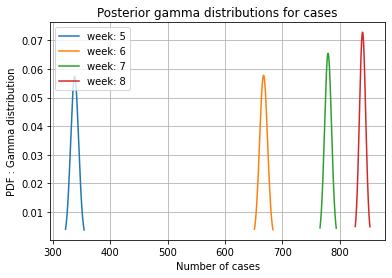


________________________________________________________________________
For Week : 5 , MAP : 4.6145041270820295
For Week : 6 , MAP : 6.495386195541153
For Week : 7 , MAP : 7.2032643134061125
For Week : 8 , MAP : 7.204701250164158


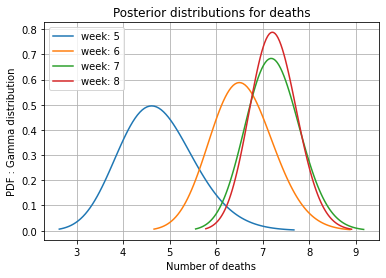

In [ ]:
from scipy import stats

#Reading june data
def get_data_from_june(input_data):
    ksy_confirmed = input_data.drop(['KY deaths', 'KS deaths'], axis=1)
    ksy_deaths = input_data.drop(['KS confirmed', 'KY confirmed'], axis=1)

    combined_cases = ksy_confirmed['KS confirmed'] + ksy_confirmed['KY confirmed']
    ksy_confirmed['Combined cases'] = combined_cases

    combined_deaths = ksy_deaths['KS deaths'] + ksy_deaths['KY deaths']
    ksy_deaths['Combined deaths'] = combined_deaths

    ksy_confirmed = ksy_confirmed.loc[(ksy_confirmed['Date'] >= '2020-06-01')]
    ksy_deaths = ksy_deaths.loc[(ksy_deaths['Date'] >= '2020-06-01')]

    return ksy_confirmed, ksy_deaths

cases, deaths = get_data_from_june(data)
cases = cases.iloc[:, 3] # taking combined cases in june
deaths = deaths.iloc[:,3] # taking combined deaths in june

# here, lambda_mme is calculated using the 1st four weeks of june data. 
lambda_mme = np.mean(cases.iloc[:28])
beta = lambda_mme 

week = 7
n = 28

for i in range(4):
    alpha = np.sum(cases.iloc[n:n + (i + 1) * week]) + 1
    scale = 1.0 / ((i + 1) * week + 1.0 / beta)
    x = np.linspace(stats.gamma.ppf(0.01, alpha, scale=scale), stats.gamma.ppf(0.99, alpha, scale=scale), 1000)
    pdf = stats.gamma.pdf(x, a=alpha, scale=scale)

    print('For Week :', str(i + 5), ', MAP :', x[np.argmax(pdf)])
    plt.plot(x, pdf, label="week: "+str(i+5))
    plt.title("Posterior gamma distributions for cases")
    plt.xlabel("Number of cases")
    plt.ylabel("PDF : Gamma distribution")
    plt.grid(True)
    plt.legend(loc='upper left')
plt.show()
print()
print('________________________________________________________________________')
######################## DEATHS ####################################

lambda_mme = np.mean(deaths.iloc[:28])
beta = lambda_mme

week = 7
n = 28

for i in range(4):
    alpha = np.sum(deaths.iloc[n:n + (i + 1) * week]) + 1
    scale = 1.0 / ((i + 1) * week + 1.0 / beta)
    x = np.linspace(stats.gamma.ppf(0.001, alpha, scale=scale), stats.gamma.ppf(0.999, alpha, scale=scale), 100)
    pdf = stats.gamma.pdf(x, a=alpha, scale=scale)

    print('For Week :', str(i + 5), ', MAP :', x[np.argmax(pdf)])
    plt.title("Posterior distributions for deaths")
    plt.plot(x, pdf, label="week: "+str(i+5))
    plt.xlabel("Number of deaths")
    plt.ylabel("PDF : Gamma distribution")
    plt.grid(True)
    plt.legend(loc='upper left')
plt.show()
print()
